In [1]:
import sys
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def imshow(tit, image):
    plt.figure(figsize=(12, 8))
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title(tit)
    plt.axis('off')    
    plt.show()

In [3]:
DIR = './src/'

## 기하학적 변환

- 평행 이동 translation
- 크기 변환 scaling
- 회전 rotation

### 1-1. 순방향 변환

512 512


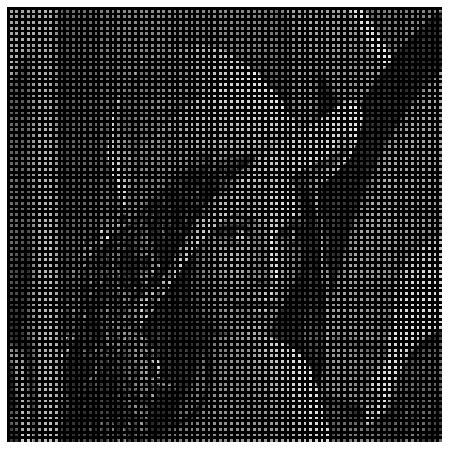

(1024, 1024)


In [4]:
src = cv2.imread(DIR + "lenna.bmp",0)
height, width = src.shape

print( height, width)

dst = np.zeros((height*2, width*2), src.dtype)

for r in range(height):
    for c in range(width):
        dst[r*2,c*2] = src[r,c]
imshow("", dst)
print(dst.shape)

512 512


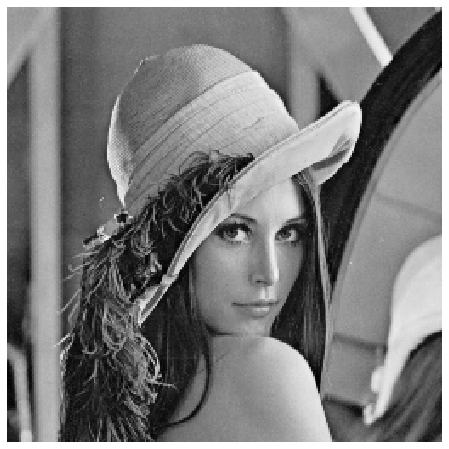

(256, 256)


In [5]:
src = cv2.imread(DIR + "lenna.bmp",0)
height, width = src.shape

print( height, width)

dst = np.zeros((int(height/2), int(width/2)), src.dtype)

for r in range(height):
    for c in range(width):
        dst[int(r/2.0),int(c/2.0)] = src[r,c]
imshow("", dst)

print(dst.shape)

### 1-2. 역방향 변환

512 512


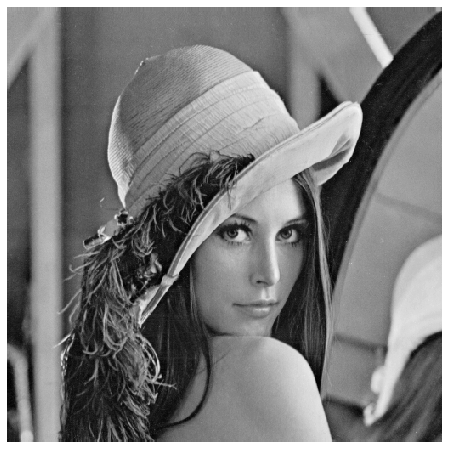

(1024, 1024)


In [6]:
src = cv2.imread(DIR + "lenna.bmp",0)
height, width = src.shape

print(height,width)

dst = np.zeros((height*2, width*2), src.dtype)
height2, width2 = dst.shape

for r in range(height2):
    for c in range(width2):
        dst[r,c] = src[int(r/2.),int(c/2.)]
        
imshow("", dst)
print(dst.shape)

512 512


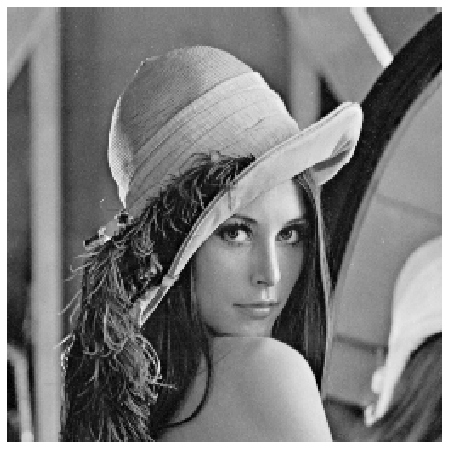

(256, 256)


In [7]:
src = cv2.imread(DIR + "lenna.bmp",0)
height, width = src.shape

print(height,width)

dst = np.zeros((int(height/2), int(width/2)), src.dtype)
height2, width2 = dst.shape

for r in range(height2):
    for c in range(width2):
        dst[r,c] = src[int(r*2),int(c*2)]
        
imshow("", dst)
print(dst.shape)

512 512


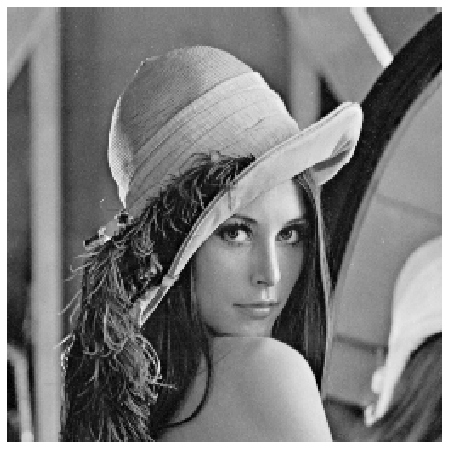

(256, 256)


In [8]:
s = 0.5

src = cv2.imread(DIR + "lenna.bmp",0)
height, width = src.shape

print(height,width)

dst = np.zeros((int(height*s), int(width*s)), src.dtype)
height2, width2 = dst.shape

for r in range(height2):
    for c in range(width2):
        dst[r,c] = src[int(r/s),int(c/s)]
        
imshow("", dst)
print(dst.shape)

### M 행렬


In [9]:
M = np.array([[1,0,50],[0,1,-30]]) # 2x3 3x1

p = np.array([[5,6,7,8,9,10],[7,7,7,7,7,7],[1,1,1,1,1,1]])

print(M)
print(p)
np.matmul(M,p) # 5+50=55 7-30=-23

[[  1   0  50]
 [  0   1 -30]]
[[ 5  6  7  8  9 10]
 [ 7  7  7  7  7  7]
 [ 1  1  1  1  1  1]]


array([[ 55,  56,  57,  58,  59,  60],
       [-23, -23, -23, -23, -23, -23]])

### 1-3. 확대/축소

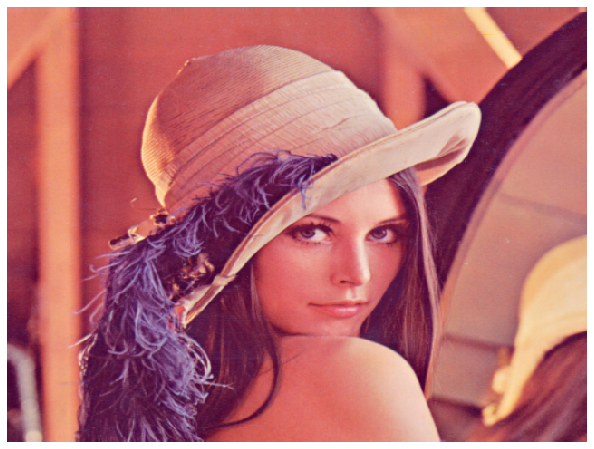

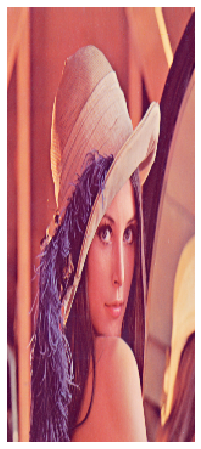

In [10]:
src = cv2.imread(DIR + 'lenna.bmp')

dst = cv2.resize(src, dsize=(640,480))
dst2 = cv2.resize(src, dsize=(0,0), fx = 0.3, fy=0.7)

imshow("", dst)

imshow("", dst2)

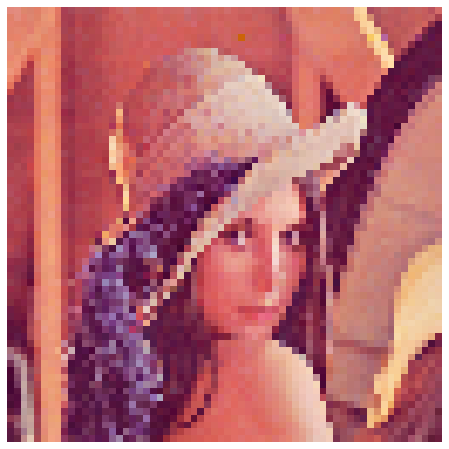

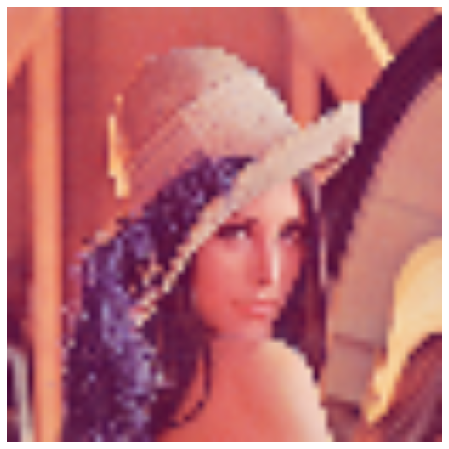

In [11]:
src = cv2.imread(DIR + 'lenna.bmp')

a=0.125

dst1 = cv2.resize(src, dsize=(0,0), fx = a, fy = a, interpolation=0) # 줄이고
dst1 = cv2.resize(dst1, dsize=(0,0), fx = 1/a, fy = 1/a, interpolation=0) # 다시 늘리고

dst2 = cv2.resize(src, dsize=(0,0), fx = a, fy = a, interpolation=1) # 양선형 보간법
dst2 = cv2.resize(dst2, dsize=(0,0), fx = 1/a, fy = 1/a, interpolation=1)

imshow("", dst1)
imshow("", dst2)

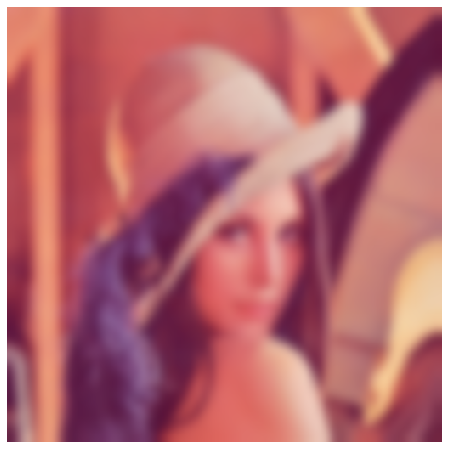

In [12]:
src = cv2.imread(DIR + 'lenna.bmp')

for i in range(3):
    src = cv2.pyrDown(src)
for i in range(3):
    src = cv2.pyrUp(src)
imshow("",src)
    

### 2. 평행 이동

- warpAffine(src, dst, M, dsize, flags = INTER_LINEAR)

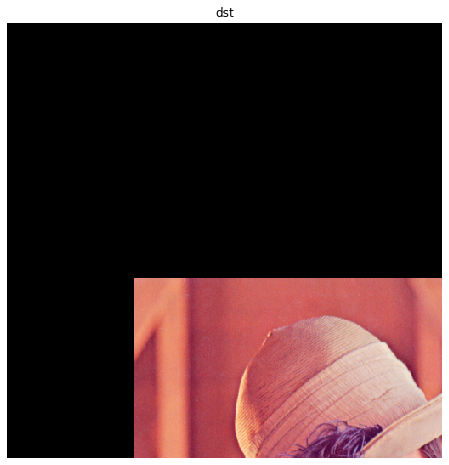

In [13]:
src = cv2.imread(DIR + 'lenna.bmp')

affine_mat = np.array([[1,0,150],
                      [0,1,300]]).astype(np.float32) # 오른쪽으로 150,아래로 300

dst = cv2.warpAffine(src, affine_mat,(0,0)) # (0,0): 사이즈 조절
imshow("dst",dst)

### 3. 회전 변환

- getRotationMatrix2D(center, angle, scale)

입력 영상에서 회전의 중심

최전 각도

배율

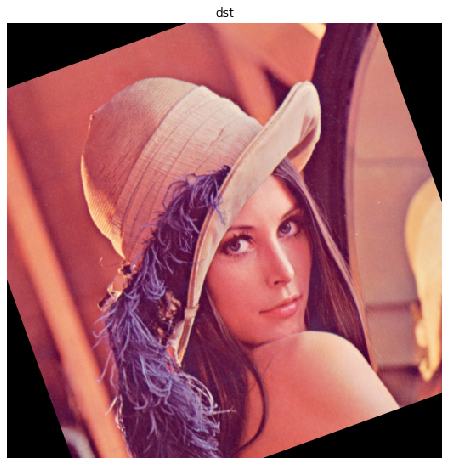

In [14]:
src = cv2.imread(DIR + 'lenna.bmp')

cp = (src.shape[1]/2, src.shape[0]/2)
affine_mat = cv2.getRotationMatrix2D(cp, 20, 1)

dst = cv2.warpAffine(src, affine_mat, (0,0))

imshow('dst', dst)

[[  0.8660254    0.5        -93.70250337]
 [ -0.5          0.8660254  162.29749663]]


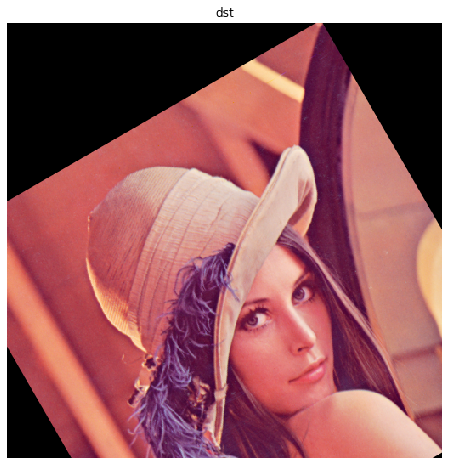

In [15]:
src = cv2.imread(DIR + 'lenna.bmp')

cp = (src.shape[1]/2, src.shape[0]/2)
affine_mat = cv2.getRotationMatrix2D(cp, 30, 1)
print(affine_mat)

affine_mat[0,2] += 20
affine_mat[1,2] += 90

dst = cv2.warpAffine(src, affine_mat, (0,0))

imshow('dst', dst)

### 4. 원근 변환

In [19]:
def on_mouse(event, x, y, flags, param):
    global cnt, src_pts
    if event == cv2.EVENT_LBUTTONDOWN:
        if cnt < 4:
            src_pts[cnt, :] = np.array([x, y]).astype(np.float32)
            cnt += 1

            cv2.circle(src, (x, y), 5, (0, 0, 255), -1)
            cv2.imshow('src', src)
        
        if cnt == 4:
            w = int(np.sqrt((src_pts[0,0]-src_pts[1,0])**2))
            h = int(np.sqrt((src_pts[1,1]-src_pts[2,1])**2))

            dst_pts = np.array([[0, 0],
                                [w - 1, 0],
                                [w - 1, h - 1],
                                [0, h - 1]]).astype(np.float32)

            pers_mat = cv2.getPerspectiveTransform(src_pts, dst_pts)

            dst = cv2.warpPerspective(src, pers_mat, (w, h))

            cv2.imshow('dst', dst)

In [22]:
cnt = 0
src_pts = np.zeros([4, 2], dtype=np.float32)
src = cv2.imread(DIR + 'naming.jpg')

if src is None:
    print('Image load failed!')
    
cv2.namedWindow('src')
cv2.setMouseCallback('src', on_mouse)

cv2.imshow('src', src)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
def on_mouse(event, x, y, flags, param):
    global cnt, src_pts
    if event == cv2.EVENT_LBUTTONDOWN:       
                
            src_pts[cnt, :] = np.array([x, y]).astype(np.float32)
            cnt += 1

            cv2.circle(src, (x, y), 5, (0, 0, 255), -1)
            cv2.imshow('src', src)
        
    if cnt == 3:
            w = 100 
            h = 100

            dst_pts = np.array([[50,50], [150,50], [100,170]]).astype(np.float32)
            
            affine_mat = cv2.getAffineTransform(src_pts, dst_pts)
            dst = cv2.warpAffine(src, affine_mat, (250, 250))

            cv2.imshow('dst', dst)


cnt = 0
src_pts = np.zeros([3, 2], dtype=np.float32)
src = cv2.imread(DIR + 'leo1.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.namedWindow('src')
cv2.setMouseCallback('src', on_mouse)

cv2.imshow('src', src)
cv2.waitKey(0)
cv2.destroyAllWindows()

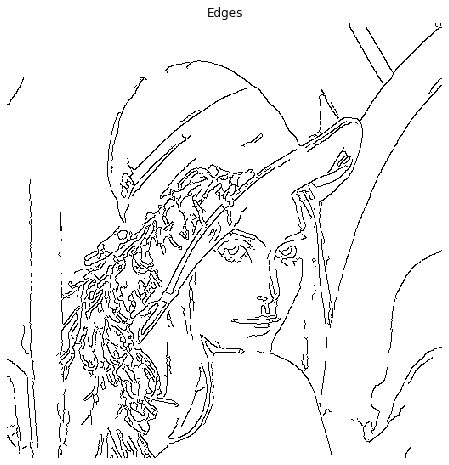

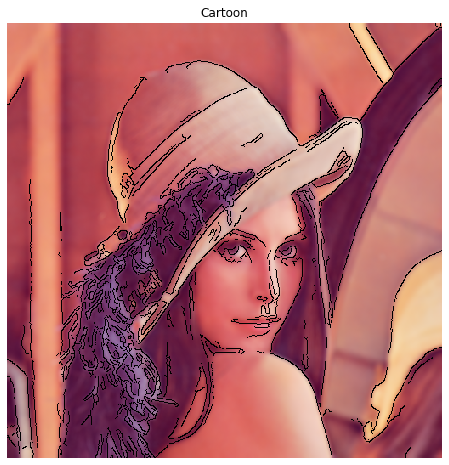

In [25]:
image = cv2.imread(DIR + 'lenna.bmp')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
edges =  255 - cv2.Canny(gray, 30,120)
color = cv2.bilateralFilter(image, 9, 300, 300)
cartoon = cv2.bitwise_and(color, color, mask=edges)

imshow("Edges", edges)
imshow("Cartoon", cartoon)